In [14]:
import random, numpy as np, pandas as pd
from matplotlib import pyplot as plt
alphap = 1.5
probp = 0.75
expon = 2 * alphap - 1

In [15]:
def betadist(alpha):
    """gives a random number from beta distribution"""
    return random.betavariate(alpha,alpha)

In [16]:
def decision(probability):
    """
    decides with a given probability whether to keep the right part
    """
    if float(probability) > random.random():
        return True
    else: 
        return False

In [17]:
def splitting(segment):
    """
    splits a given segment. left and right are endpoints of the segment
    returns : 
        xL -> length of the left segment
        xR -> length of the right segment
        flag -> keeping the right segment
        xLp, xRp -> probability(unnormalized) for being selected
        change -> change of normalization const
    """
    xL = segment * betadist(alphap)
    xR = segment - xL
    flag = decision(probp)
    xLp = xL**expon
    xRp = xR**expon
    change = xLp + xRp - segment**expon
    return xL, xR, flag, xLp, xRp, change

In [18]:
def pickindex(frag_prob, frag_prob_sum):
    """
    picks up a segment to be subsequently split
    """
    r = random.uniform(0, frag_prob_sum)
    sum_ = 0
    for index in range(len(frag_prob)):
        sum_ += frag_prob[index]
        if sum_ < r:
            continue
        else:
            return index

In [19]:
def number_length(segment_lengths,flags):
    
    N = 0
    M = 0

    for i in range(len(flags)):
        if flags[i]:
            N += 1
            M += segment_lengths[i]
            pass
        pass
    return N, M

In [20]:
def realization_value(total_iteration, min_iteration, iteration_step):
    
    lengths = [1.]
    flags = [True]
    frag_prob = [1.] # raw probability, not normalized
    frag_prob_sum = 1.0 # normalization const

    iteration_list = list(range(min_iteration, total_iteration + 1, iteration_step))
    N_realization = []
    M_realization = []
    
    for i in range(total_iteration + 1):
        
        index = pickindex(frag_prob, frag_prob_sum)
        
        if flags[index] == True:

            xL, xR, flag, xLp, xRp, change = splitting(lengths[index])
            
            lengths[index] = xL
            lengths.append(xR)
            flags.append(flag)
            frag_prob[index] = xLp 
            frag_prob.append(xRp)
            frag_prob_sum += change
            pass
        
        if i+1 in iteration_list:
            N, M = number_length(lengths,flags)
            N_realization.append(N)
            M_realization.append(M)
        pass 
    
    N_list = np.array(N_realization)
    M_list = np.array(M_realization)
    
    return N_list, M_list

In [21]:
import time
t1 = time.time()
realization_value(100_000, 10_000, 10_000)
t2 = time.time()
run_time = t2 - t1
print("run_time is ", run_time, " sec")

run_time is  0.10676908493041992  sec


In [22]:
def ensemble_average(total_iteration, min_iteration, iteration_step, ensemble_size):

    data_points = int ((total_iteration - min_iteration)/iteration_step + 1)
    N_ensemble = np.zeros(data_points)
    M_ensemble = np.zeros(data_points)
    
    for i in range(ensemble_size):
        if i % 1000 == 0:
            print("working with realization ",i)
        N_list, M_list = realization_value(total_iteration, min_iteration, iteration_step)
        N_ensemble += N_list
        M_ensemble += M_list
        pass
    
    N_average = N_ensemble/ensemble_size
    M_average = M_ensemble/ensemble_size
    
    return N_average, M_average

In [23]:
N_average, M_average = ensemble_average(100_000, 10_000, 10_000, 100_000)

working with realization  0
working with realization  1000
working with realization  2000
working with realization  3000
working with realization  4000
working with realization  5000
working with realization  6000
working with realization  7000
working with realization  8000
working with realization  9000
working with realization  10000
working with realization  11000
working with realization  12000
working with realization  13000
working with realization  14000
working with realization  15000
working with realization  16000
working with realization  17000
working with realization  18000
working with realization  19000
working with realization  20000
working with realization  21000
working with realization  22000
working with realization  23000
working with realization  24000
working with realization  25000
working with realization  26000
working with realization  27000
working with realization  28000
working with realization  29000
working with realization  30000
working with realizat

0.7694796885429794


Text(0, 0.5, '$\\ln\\,N$')

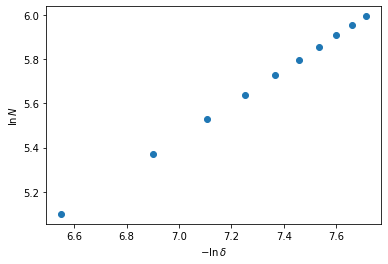

In [24]:
N_log = np.log(N_average)
minus_delta_log = N_log - np.log(M_average)
slope, intercept = np.polyfit(minus_delta_log, N_log, 1)
print(slope)
plt.plot(minus_delta_log, N_log, "o")
plt.xlabel(r"$-\ln\,\delta$")
plt.ylabel(r"$\ln\,N$")

In [25]:
N_average

array([164.01538, 214.98442, 251.67613, 281.40256, 306.829  , 329.24212,
       349.48051, 367.97691, 385.12342, 401.13471])

In [26]:
M_average

array([0.2343812 , 0.21614432, 0.20619561, 0.19940856, 0.19430301,
       0.19023485, 0.18686685, 0.18399592, 0.18150352, 0.17929593])